# Project 2 - Binary with S-Type Planet
# Brandon Shane, Ina Park, Toshan Vysyraju, Arya Lakshmanan

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
from astropy import constants as const
from astropy import units as u

In [11]:
#Defining given values here to be used later
#Values are given in AU and solar masses
M1 = 1
M2 = 2
M = M1 + M2
a = 1
e = 0
mu = (M1*M2)/(M1+M2)

In [12]:
def df_2body(vec,t):
    x1,y1,z1,vx1,vy1,vz1,x2,y2,z2,vx2,vy2,vz2 = vec

    r = np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)
    GM1r3 = (M2*4.0*np.pi**2)/(r**3)
    GM2r3 = (M1*4.0*np.pi**2)/(r**3)

    dvec = np.zeros(len(vec))
    dvec[0] = vx1
    dvec[1] = vy1
    dvec[2] = vz1
    dvec[3] = GM1r3*(x2-x1)
    dvec[4] = GM1r3*(y2-y1)
    dvec[5] = GM1r3*(z2-z1)
    dvec[6] = vx2
    dvec[7] = vy2
    dvec[8] = vz2
    dvec[9] = GM2r3*(x1-x2)
    dvec[10] = GM2r3*(y1-y2)
    dvec[11] = GM2r3*(z1-z2)
    return dvec

In [13]:
# Here, we consider the time when out two bodies are furthest away
# Additionally, we orient our axis such that both bodies lie on the x-axis
x10 = -(mu/M1)*a
x20 = (mu/M2)*a

l = np.sqrt(4*(np.pi**2)*M*a*(1-e**2))

v0 = l/(a*(1-e**2))

vy10 = -(mu/M1)*v0
vy20 = (mu/M2)*v0

vec0 = np.array([x10, 0, 0,
                 0, vy10, 0,
                 x20, 0, 0,
                 0, vy20, 0])

P = np.sqrt((a**3)/M)
tarr = np.linspace(0, P, 200)

ans = integrate.odeint(df_2body, vec0, tarr)
x1 = ans[:,0]
y1 = ans[:,1]
z1 = ans[:,2]
vx1 = ans[:,3]
vy1 = ans[:,4]
vz1 = ans[:,5]
x2 = ans[:,6]
y2 = ans[:,7]
z2 = ans[:,8]
vx2 = ans[:,9]
vy2 = ans[:,10]
vz2 = ans[:,11]
print()

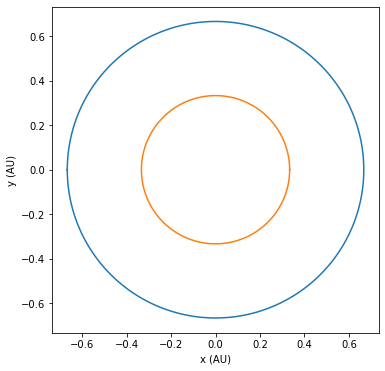

In [14]:
plt.figure(figsize=(6,6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.gca().set_aspect('equal')
plt.show()

# Add third, massless object

In [1]:
M3 = 0

In [ ]:
def df_3body(vec,t):
    x1,y1,z1,vx1,vy1,vz1,x2,y2,z2,vx2,vy2,vz2,x3,y3,z3,vx3,vy3,vz3 = vec

    r1 = np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)
    GM1r13 = (M2*4.0*np.pi**2)/(r1**3)
    GM2r13 = (M1*4.0*np.pi**2)/(r1**3)
    
    r2 = np.sqrt((x2-x3)**2 + (y2-y3)**2 + (z2-z3)**2)
    GM2r23 = (M3*4.0*np.pi**2)/(r2**3)
    GM3r23 = (M2*4.0*np.pi**2)/(r2**3)
    
    r3 = np.sqrt((x3-x1)**2 + (y3-y1)**2 + (z3-z1)**2)
    GM3r33 = (M1*4.0*np.pi**2)/(r3**3)
    GM1r33 = (M3*4.0*np.pi**2)/(r3**3)

    dvec = np.zeros(len(vec))
    dvec[0] = vx1
    dvec[1] = vy1
    dvec[2] = vz1
    dvec[3] = GM1r13*(x2-x1) + GM1r33*(x3-x1)
    dvec[4] = GM1r13*(y2-y1)
    dvec[5] = GM1r13*(z2-z1)
    dvec[6] = vx2
    dvec[7] = vy2
    dvec[8] = vz2
    dvec[9] = GM2r13*(x1-x2)
    dvec[10] = GM2r13*(y1-y2)
    dvec[11] = GM2r13*(z1-z2)
    dvec[12] = vx3
    dvec[13] = vy3
    dvec[14] = vz3
    dvec[15] = GM2r3*(x1-x2)
    dvec[16] = GM2r3*(y1-y2)
    dvec[17] = GM2r3*(z1-z2)
    return dvec